<a href="https://www.kaggle.com/code/teetlhmus/pjk-10klass-l-messi?scriptVersionId=129071529" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/-lionel-messi-all-club-goals/data.csv


In [2]:
# lähteandmete laadimine tekstifailist dataframe'i
df = pd.read_csv('/kaggle/input/-lionel-messi-all-club-goals/data.csv')

In [3]:
# kuvab dataframe'i sisu (esimesed ja viimased read)
df

# Oluline on tähele panna, et iga rida tähistab ühte Messi löödud väravat
# Järelikult:
#    - kui Messi mängus väravat ei löönud, puudub andmetes rida selle mängu kohta
#    - kui Messi lõi ühes mängus mitu väravat, on selle mängu kohta ka vastav arv ridu
#    - kui teeme liigendtabeli, kasutame agregeerimiseks count-funktsiooni

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho
...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,22/23,Ligue 1,21,2/1/23,A,Paris Saint-Germain,Montpellier HSC,1:3,SS,72,0:2,Left-footed shot,Fabián Ruiz
700,22/23,Ligue 1,22,2/4/23,H,Paris Saint-Germain,FC Toulouse,2:1,SS,58,2:1,Left-footed shot,Achraf Hakimi
701,22/23,Ligue 1,24,2/19/23,H,Paris Saint-Germain,LOSC Lille,4:3,CF,90+5,4:3,Direct free kick,\t
702,22/23,Ligue 1,25,2/26/23,A,Paris Saint-Germain,Olympique Marseille,0:3,CF,29,0:2,Right-footed shot,Kylian Mbappé


-----------------------------------------------------------------
EESMÄRK: uurime Messi pealelöökide variante läbi erinevate hooaegade
-----------------------------------------------------------------

In [4]:
# puuduvate väärtuste kontroll andmetes
df.isnull().sum()

Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position      0
Minute                0
At_score              0
Type                  1
Goal_assist         214
dtype: int64

In [5]:
df['Type']

0       Left-footed shot
1       Left-footed shot
2       Left-footed shot
3       Left-footed shot
4       Left-footed shot
             ...        
699     Left-footed shot
700     Left-footed shot
701     Direct free kick
702    Right-footed shot
703     Left-footed shot
Name: Type, Length: 704, dtype: object

In [6]:
# "Type"-veerus on üks puuduv väärtus, uurime lähemalt millisel real
df[df['Type'].isnull()]

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
22,06/07,LaLiga,37,06/09/07,H,FC Barcelona,RCD Espanyol Barcelona,2:02,RW,43,1:01,NaN,Gianluca Zambrotta


In [7]:
# Millega puuduva väärtuse võiks asendada - vaatame mis on enim levinud
df.groupby('Type')['Type'].count()

Type
Chest                       1
Counter attack goal         1
Deflected shot on goal      2
Direct free kick           52
Header                     24
Left-footed shot          436
Long distance kick          1
Penalty                    84
Penalty rebound             3
Right-footed shot          86
Solo run                    4
Tap-in                      9
Name: Type, dtype: int64

In [8]:
# Asendame puuduva väärtuse kõige populaarsema variandiga
df['Type'][22] = 'Left-footed shot'

In [9]:
# Kontroll peale parandamist:
df.groupby('Type')['Type'].count()

Type
Chest                       1
Counter attack goal         1
Deflected shot on goal      2
Direct free kick           52
Header                     24
Left-footed shot          437
Long distance kick          1
Penalty                    84
Penalty rebound             3
Right-footed shot          86
Solo run                    4
Tap-in                      9
Name: Type, dtype: int64

In [10]:
# Sõltuvalt eesmärgist tuleks uurida ka teiste veergude väärtuseid ja vajadusel andmeid parandada
# Näiteks on allpool näha, et osad mängupositsioonide väärtused on topelt - ilmselt põhjustatud liigsest tühikust (saab leida ja parandada ka otse csv-failis)

df["Playing_Position"].value_counts()
# CF - center front
# RW - right wing
# LW - left wing
# SS - striker
# AM - attacking middle

CF     276
RW     221
RW      95
CF      40
SS      32
SS      23
AM       9
AM       7
LW       1
Name: Playing_Position, dtype: int64

In [11]:
# Agregeerime lähteandmed hooaegade kaupa (veerg "Season") ning jagame gruppideks vastavalt pealelöögi tüübile (veerg "Type")

# Meid huvitavad tulemused hooaja täpsusega, seepärast kasutame aggfunc = 'Count' mis loeb kokku kõik 'Venue'-veerus olevad väärtused

pv = pd.pivot_table(df, values = 'Venue', aggfunc = 'count', index = 'Season', columns = 'Type', fill_value = 0, margins = True)

# Sõltuvalt lähteandmetest võib agregeerimiseks kasutada ka summeerimist ning keskmise, miinimumi, maksimumi arvutamist jt. Antud näite korral sobib vaid count().

# fill_value = 0 asendab "NaN" väärtused 0-ga
# "margins = True" lisab veergude ja  ridade summad

pv # kuvab loodud tabeli

Type,Chest,Counter attack goal,Deflected shot on goal,Direct free kick,Header,Left-footed shot,Long distance kick,Penalty,Penalty rebound,Right-footed shot,Solo run,Tap-in,All
Season,,,,,,,,,,,,,
04/05,0,0,0,0,0,1,0,0,0,0,0,0,1
05/06,0,0,0,0,1,6,0,0,0,1,0,0,8
06/07,0,0,0,0,0,14,0,0,0,2,1,0,17
07/08,0,0,1,0,0,10,0,5,0,0,0,0,16
08/09,0,1,0,1,2,22,0,4,1,7,0,0,38
09/10,1,0,0,2,3,29,0,2,0,10,0,0,47
10/11,0,0,0,1,1,38,0,5,0,5,1,2,53
11-Dec,0,0,0,3,3,43,0,14,0,9,0,1,73
13/14,0,0,0,3,1,22,0,8,1,5,1,0,41


In [12]:
# Loodud liigendtabelis "pv" on 2 rida, kus "Season" väärtus ei sobi teistega
df.groupby('Season')['Type'].count()

Season
04/05      1
05/06      8
06/07     17
07/08     16
08/09     38
09/10     47
10/11     53
11-Dec    73
13/14     41
14/15     58
15/16     41
16/17     54
17/18     45
18/19     51
19/20     31
20/21     38
21/22     14
22/23     18
Dec-13    60
Name: Type, dtype: int64

In [13]:
# Loodud liigendtabelis "pv" on 2 rida, kus "Season" väärtus on teistsugune.
# Uurime lähemalt väärtust "11-Dec"

pd.set_option('display.max_rows', 75) # võimaldab kuvada rohkem ridu, kui on vaikimisi seadistatud

df[df['Season']=='11-Dec']

# df[df['Season']=='11-Dec']

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
180,11-Dec,Supercopa,final,8/14/11,A,FC Barcelona,Real Madrid,2:02,CF,45,1:02,Left-footed shot,Thiago
181,11-Dec,Supercopa,final,8/17/11,H,FC Barcelona,Real Madrid,3:02,CF,44,2:01,Right-footed shot,Gerard Pique
182,11-Dec,Supercopa,final,8/17/11,H,FC Barcelona,Real Madrid,3:02,CF,88,3:02,Left-footed shot,Adriano
183,11-Dec,UEFA Super Cup,Final,8/26/11,H,FC Barcelona,FC Porto,2:00,CF,39,1:00,Left-footed shot,NaN
184,11-Dec,LaLiga,2,8/29/11,H,FC Barcelona,Villarreal CF,5:00,CF,51,4:00,Right-footed shot,Andres Iniesta
185,11-Dec,LaLiga,2,8/29/11,H,FC Barcelona,Villarreal CF,5:00,CF,74,5:00,Left-footed shot,Thiago
186,11-Dec,LaLiga,4,9/17/11,H,FC Barcelona,CA Osasuna,8:00,CF,5,1:00,Left-footed shot,Dani Alves
187,11-Dec,LaLiga,4,9/17/11,H,FC Barcelona,CA Osasuna,8:00,CF,41,5:00,Left-footed shot,Cesc Fabregas
188,11-Dec,LaLiga,4,9/17/11,H,FC Barcelona,CA Osasuna,8:00,CF,79,8:00,Left-footed shot,Cesc Fabregas
189,11-Dec,LaLiga,6,9/24/11,H,FC Barcelona,Atletico de Madrid,5:00,CF,26,3:00,Left-footed shot,Pedro


In [14]:
df[df['Season']=='11-Dec']

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
180,11-Dec,Supercopa,final,8/14/11,A,FC Barcelona,Real Madrid,2:02,CF,45,1:02,Left-footed shot,Thiago
181,11-Dec,Supercopa,final,8/17/11,H,FC Barcelona,Real Madrid,3:02,CF,44,2:01,Right-footed shot,Gerard Pique
182,11-Dec,Supercopa,final,8/17/11,H,FC Barcelona,Real Madrid,3:02,CF,88,3:02,Left-footed shot,Adriano
183,11-Dec,UEFA Super Cup,Final,8/26/11,H,FC Barcelona,FC Porto,2:00,CF,39,1:00,Left-footed shot,NaN
184,11-Dec,LaLiga,2,8/29/11,H,FC Barcelona,Villarreal CF,5:00,CF,51,4:00,Right-footed shot,Andres Iniesta
185,11-Dec,LaLiga,2,8/29/11,H,FC Barcelona,Villarreal CF,5:00,CF,74,5:00,Left-footed shot,Thiago
186,11-Dec,LaLiga,4,9/17/11,H,FC Barcelona,CA Osasuna,8:00,CF,5,1:00,Left-footed shot,Dani Alves
187,11-Dec,LaLiga,4,9/17/11,H,FC Barcelona,CA Osasuna,8:00,CF,41,5:00,Left-footed shot,Cesc Fabregas
188,11-Dec,LaLiga,4,9/17/11,H,FC Barcelona,CA Osasuna,8:00,CF,79,8:00,Left-footed shot,Cesc Fabregas
189,11-Dec,LaLiga,6,9/24/11,H,FC Barcelona,Atletico de Madrid,5:00,CF,26,3:00,Left-footed shot,Pedro


In [15]:
# Näeme "Date" väärtuse alusel, et kõik "11-Dec" kuupäevaga read kuuluvad hooaega "11/12"
df[df['Season']=='11-Dec'].drop_duplicates(subset = "Date")['Date']

180     8/14/11
181     8/17/11
183     8/26/11
184     8/29/11
186     9/17/11
189     9/24/11
192     9/28/11
194    10/15/11
196    10/29/11
199    11-01/11
202    11/06/11
203    11/19/11
204    11/23/11
205    11/29/11
206    12-03/11
207    12/18/11
209    01-04/12
211     1/15/12
213     1/22/12
216    02-04/12
217     2/14/12
218     2/19/12
222     2/26/12
223    03/07/12
228    03/11/12
230     3/17/12
231     3/20/12
234     3/24/12
235     3/31/12
236    04-03/12
238    04/07/12
240    04/10/12
241     4/14/12
243     4/29/12
245    05-02/12
248    05/05/12
252     5/25/12
Name: Date, dtype: object

In [16]:
# Parandame "Season"-veeru väärtused õigeks

df['Season'][df['Season']=='11-Dec'] = '11/12'

In [17]:
# Kontrollime tulemust peale parandamist:
df.groupby('Season')['Venue'].count()

Season
04/05      1
05/06      8
06/07     17
07/08     16
08/09     38
09/10     47
10/11     53
11/12     73
13/14     41
14/15     58
15/16     41
16/17     54
17/18     45
18/19     51
19/20     31
20/21     38
21/22     14
22/23     18
Dec-13    60
Name: Venue, dtype: int64

In [18]:
# Uurime lähemalt väärtust "Dec-13"

df[df['Season']=='Dec-13']

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
253,Dec-13,LaLiga,1,8/19/12,H,FC Barcelona,Real Sociedad,5:01,CF,10,2:01,Left-footed shot,Pedro
254,Dec-13,LaLiga,1,8/19/12,H,FC Barcelona,Real Sociedad,5:01,CF,15,3:01,Left-footed shot,Cristian Tello
255,Dec-13,Supercopa,final,8/23/12,H,FC Barcelona,Real Madrid,3:02,CF,60,2:01,Penalty,NaN
256,Dec-13,LaLiga,2,8/26/12,A,FC Barcelona,CA Osasuna,1:02,CF,74,1:01,Left-footed shot,Alexis Sanchez
257,Dec-13,LaLiga,2,8/26/12,A,FC Barcelona,CA Osasuna,1:02,CF,79,1:02,Left-footed shot,Jordi Alba
258,Dec-13,Supercopa,final,8/29/12,A,FC Barcelona,Real Madrid,2:01,CF,45,2:01,Direct free kick,NaN
259,Dec-13,LaLiga,4,9/15/12,A,FC Barcelona,Getafe CF,1:04,CF,74,0:02,Penalty,NaN
260,Dec-13,LaLiga,4,9/15/12,A,FC Barcelona,Getafe CF,1:04,CF,78,0:03,Left-footed shot,Pedro
261,Dec-13,UEFA Champions League,Group Stage,9/19/12,H,FC Barcelona,Spartak Moscow,3:02,CF,71,2:02,Left-footed shot,Cristian Tello
262,Dec-13,UEFA Champions League,Group Stage,9/19/12,H,FC Barcelona,Spartak Moscow,3:02,CF,80,3:02,Header,Alexis Sanchez


In [19]:
# Näeme "Date" väärtuse alusel, et kõik "13-Dec" kuupäevaga read kuuluvad hooaega "12/13"
df[df['Season']=='Dec-13'].drop_duplicates(subset = 'Date')['Date']

253     8/19/12
255     8/23/12
256     8/26/12
258     8/29/12
259     9/15/12
261     9/19/12
263    10/07/12
265    10/20/12
268    10/27/12
270    11/07/12
271    11/11/12
273    11/17/12
275    11/20/12
277    11/25/12
279    12-01/12
281    12/09/12
283    12/12/12
285    12/16/12
287    12/22/12
288    01/06-13
289     1/13/13
290     1/16/13
291     1/19/13
292     1/24/13
293     1/27/13
297    02-03-13
298    02/10-13
299     2/16/13
301     2/23/13
302    03-02-13
303    03/09-13
304    03/12-13
306     3/17/13
308     3/30/13
309    04-02-13
310     4/27/13
311    05/05-13
Name: Date, dtype: object

In [20]:
# Parandame "Season"-veeru väärtused õigeks
df['Season'][df['Season']=='Dec-13'] = '12/13'

In [21]:
# Kontrollime tulemust peale parandamist:
df.groupby('Season')['Venue'].count()

Season
04/05     1
05/06     8
06/07    17
07/08    16
08/09    38
09/10    47
10/11    53
11/12    73
12/13    60
13/14    41
14/15    58
15/16    41
16/17    54
17/18    45
18/19    51
19/20    31
20/21    38
21/22    14
22/23    18
Name: Venue, dtype: int64

In [22]:
# Hooaeg "04/05" on esindatud vaid ühe reaga, uurime lähemalt:
df[df['Season']=='04/05']

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho


In [23]:
# Teades et Messi jalgpalluri karjäär FC Barcelonas algas aastal 2000, on ilmselt tegemist poolikute andmetega selle hooaja kohta
# Kustutame rea, viidates index-veeru väärtusele
df = df.drop(df.index[0])

In [24]:
# Kontroll peale kustutamist
df.groupby('Season')['Type'].count()

Season
05/06     8
06/07    17
07/08    16
08/09    38
09/10    47
10/11    53
11/12    73
12/13    60
13/14    41
14/15    58
15/16    41
16/17    54
17/18    45
18/19    51
19/20    31
20/21    38
21/22    14
22/23    18
Name: Type, dtype: int64

In [25]:
# 2022-2023 hooaeg pole veel lõppenud, uurime millise kuupäevani on väravatega mängud kajastatud
df[df['Season']=='22/23']

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
686,22/23,Troph�e des Champions,Final,7/31/22,H,Paris Saint-Germain,FC Nantes,4:00,CF,22,1:00,Right-footed shot,NaN
687,22/23,Ligue 1,1,08/06-22,A,Paris Saint-Germain,Clermont Foot,0:05,CF,80,0:04,Left-footed shot,Neymar
688,22/23,Ligue 1,1,08/06-22,A,Paris Saint-Germain,Clermont Foot,0:05,CF,86,0:05,Left-footed shot,Leandro Paredes
689,22/23,Ligue 1,3,8/21/22,A,Paris Saint-Germain,LOSC Lille,1:07,AM,27,0:02,Right-footed shot,Nuno Mendes
690,22/23,Champions League,Group Stage,9/14/22,A,Paris Saint-Germain,Maccabi Haifa,1:03,SS,37,1:01,Left-footed shot,NaN
691,22/23,Ligue 1,8,9/18/22,A,Paris Saint-Germain,Olympique Lyon,0:01,AM,5,0:01,Left-footed shot,Neymar
692,22/23,Ligue 1,9,10/1/22,H,Paris Saint-Germain,OGC Nice,2:1,AM,28,1:0,Direct free kick,NaN
693,22/23,UEFA Champions League,Group Stage,10/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,22,0:1,Left-footed shot,Neymar
694,22/23,Ligue 1,12,10/21/22,A,Paris Saint-Germain,AC Ajaccio,0:3,CF,78,0:2,Left-footed shot,Kylian Mbappe
695,22/23,UEFA Champions League,Group Stage,10/25/22,H,Paris Saint-Germain,Maccabi Haifa,7:2,SS,19,1:0,Left-footed shot,Kylian Mbappe


In [26]:
# Eemaldame pooliku hooajaga seotud read, et hooaegade tulemused oleksid võrreldavad
df = df[df['Season'] != '22/23']

In [27]:
# Kontroll peale kustutamist
df.groupby('Season')['Venue'].count()

Season
05/06     8
06/07    17
07/08    16
08/09    38
09/10    47
10/11    53
11/12    73
12/13    60
13/14    41
14/15    58
15/16    41
16/17    54
17/18    45
18/19    51
19/20    31
20/21    38
21/22    14
Name: Venue, dtype: int64

In [28]:
# Loome parandatud andmete alusel uue grupeeritud ja agregeeritud liigendtabeli

pv = pd.pivot_table(df, values = 'Venue', aggfunc = 'count', index = 'Season', columns = 'Type', fill_value = 0)
# pv = pd.pivot_table(df, values = 'Venue', aggfunc = 'count', index = 'Season', columns = 'Type', fill_value = 0, margins = True)

pv # kuvab loodud tabeli

Type,Chest,Counter attack goal,Deflected shot on goal,Direct free kick,Header,Left-footed shot,Long distance kick,Penalty,Penalty rebound,Right-footed shot,Solo run,Tap-in
Season,,,,,,,,,,,,
05/06,0,0,0,0,1,6,0,0,0,1,0,0
06/07,0,0,0,0,0,14,0,0,0,2,1,0
07/08,0,0,1,0,0,10,0,5,0,0,0,0
08/09,0,1,0,1,2,22,0,4,1,7,0,0
09/10,1,0,0,2,3,29,0,2,0,10,0,0
10/11,0,0,0,1,1,38,0,5,0,5,1,2
11/12,0,0,0,3,3,43,0,14,0,9,0,1
12/13,0,0,0,4,2,43,0,5,0,5,0,1
13/14,0,0,0,3,1,22,0,8,1,5,1,0


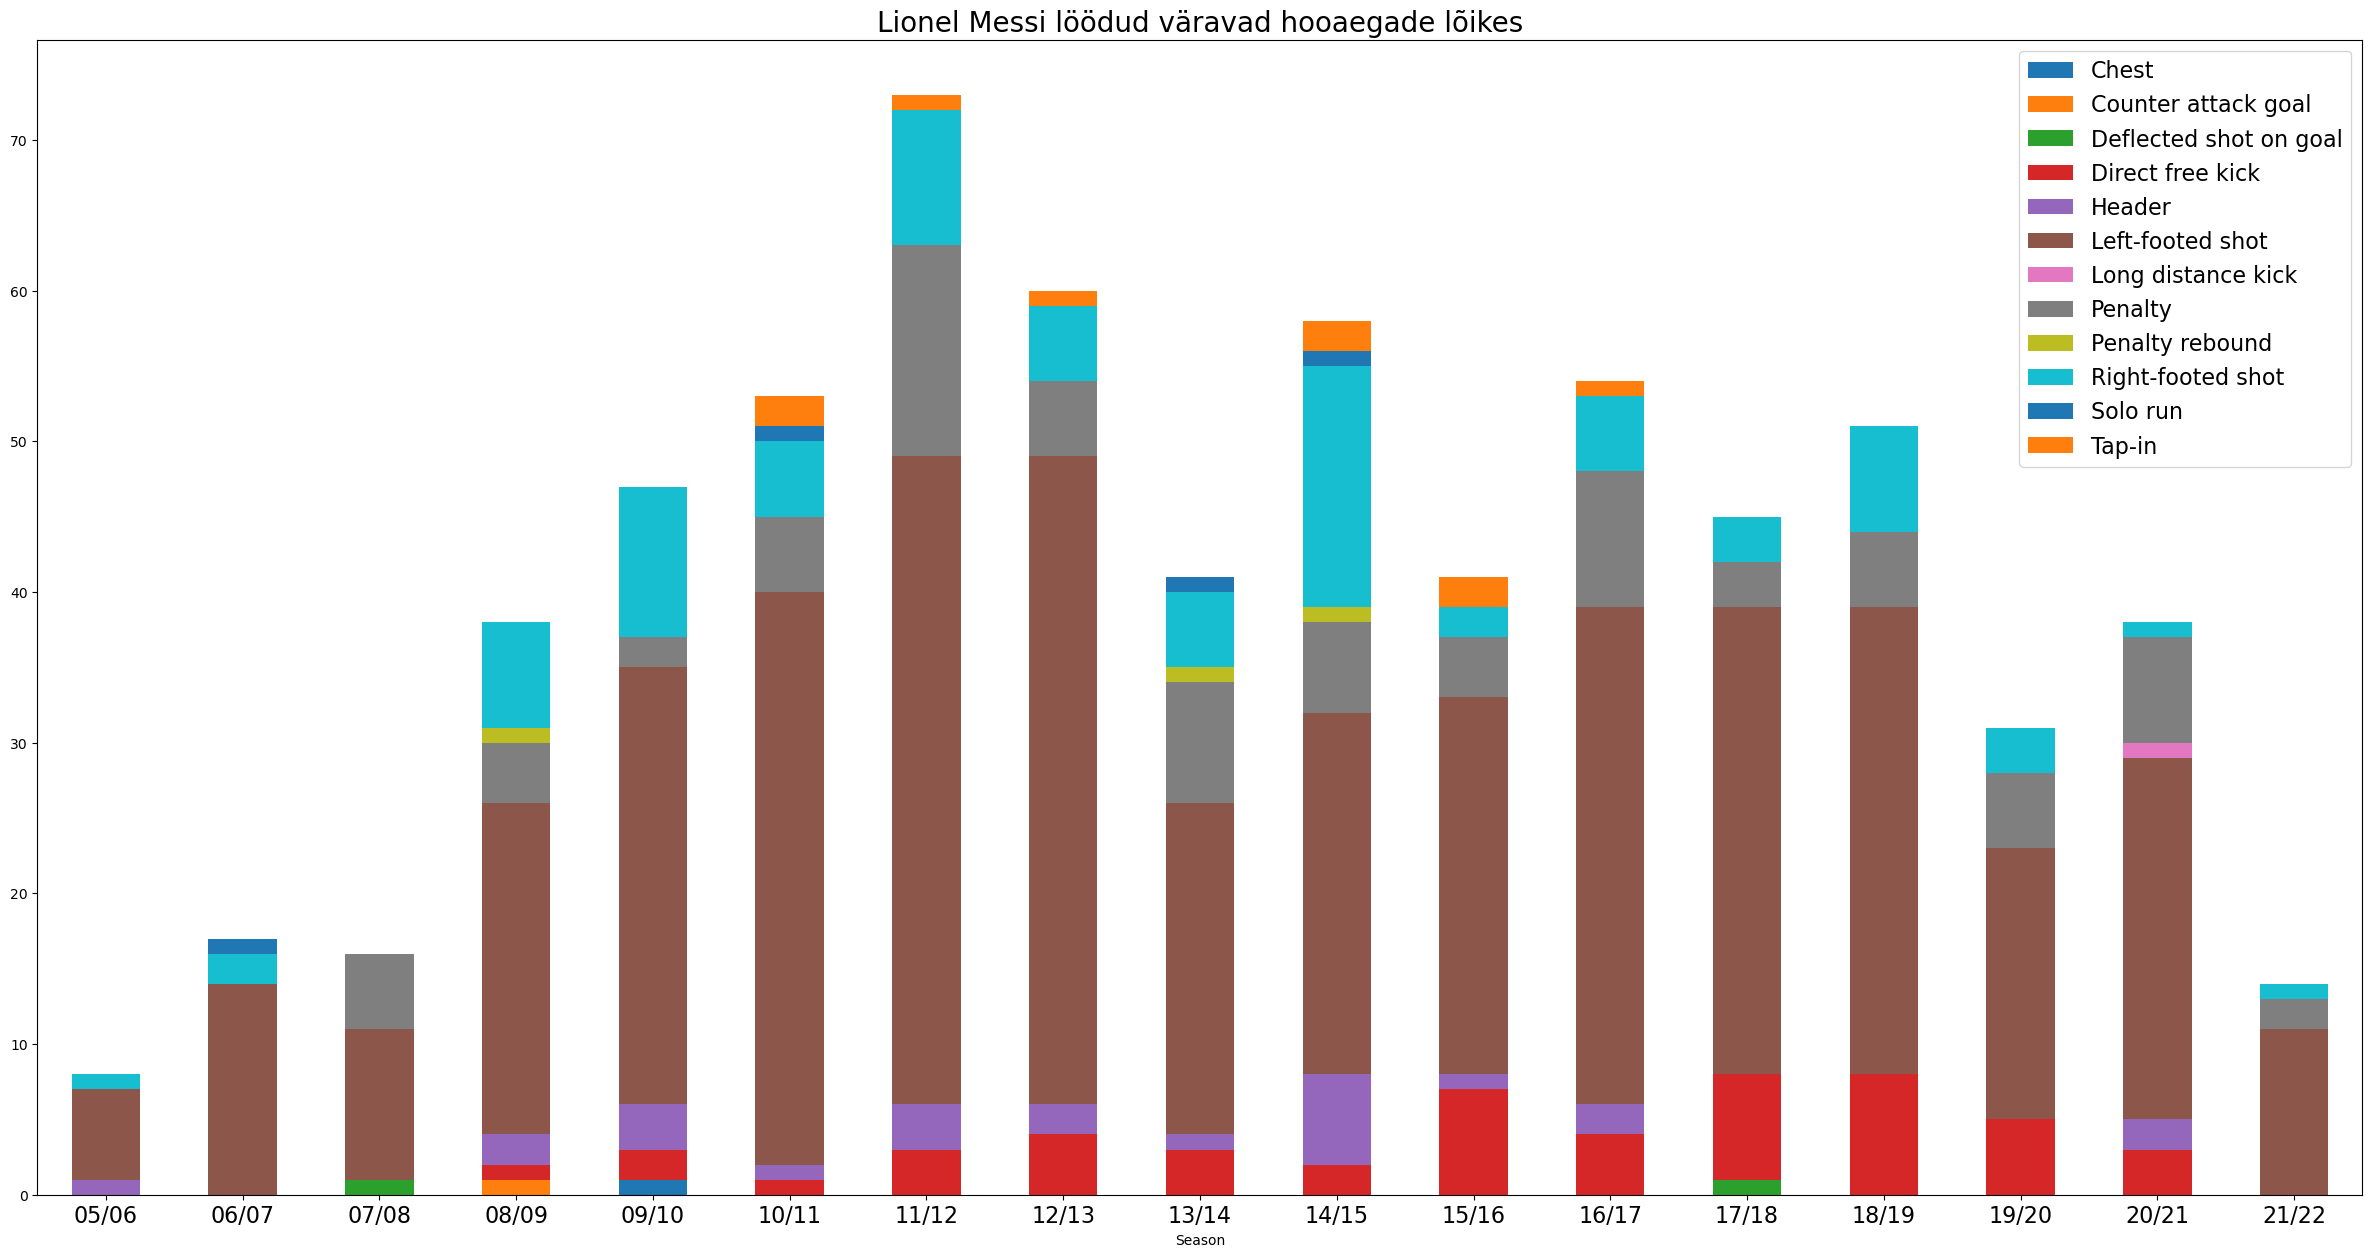

In [29]:
# Graafiku joonistamine loodud tabeli "pv" andmete põhjal

import matplotlib.pyplot as plt

pv.plot(kind='bar', stacked=True, figsize = (30,15)) # stacked = True: pealelöökide tüübid kuvatakse üksteise peal, mitte kõrval

# Just add a title and rotate the x-axis labels to be horizontal.
plt.title('Lionel Messi löödud väravad hooaegade lõikes', fontsize = 20)
plt.xticks(rotation=0, ha='center', fontsize = 16)
plt.legend(fontsize=16)

-----------------------------------------------------------------------------------------------------------
KODUNE TÖÖ 28.märtsiks


Analüüsi andmeid mõnest teisest vaatenurgast, vajadusel paranda, agregeeri ja grupeeri, joonista graafik(ud)
------------------------------------------------------------------------------------------------------------

NÄIDE 1.
Läädud väravad erinevatest positsioonidest läbi kõikide hooaegade kokku

In [30]:
# Teeme uue liigendabeli nimega pv2: veergudeks mängupositsioon, read agregeerime kokku (index = .. ei kasuta)

pv2 = pd.pivot_table(df, values = 'Type', aggfunc = 'count', columns = 'Playing_Position', fill_value = 0)

# kuvame saadud tabeli
pv2

Playing_Position,AM,AM,CF,CF,LW,RW,RW,SS,SS
Type,4,7,268,40,1,220,95,18,32


In [31]:
# Märgenditeks võtame pv2 tabeli veergude nimed ja teisendame need listiks

labels_for_chart = pv2.columns.values.tolist()

# kuvame saadud listi
labels_for_chart

['AM', 'AM ', 'CF', 'CF ', 'LW', 'RW', 'RW ', 'SS', 'SS ']

In [32]:
# Graafiku väärtusteks võtame pv2 tabeli ainukese rea (rea index = 0) väärtused ja teisendame need listiks

data_for_chart = pv2.iloc[0].values.tolist()

# kuvame saadud listi
data_for_chart

[4, 7, 268, 40, 1, 220, 95, 18, 32]

([<matplotlib.patches.Wedge at 0x7b0c703bdb50>,
 [Text(1.099814907398259, 0.020178440587885274, 'AM'),
  Text(1.0973980886301902, 0.07561372276779697, 'AM '),
  Text(0.2623051874671224, 1.0682677513750183, 'CF'),
  Text(-1.0135926943830085, 0.4273521380470601, 'CF '),
  Text(-1.0756114557605543, 0.2303475553086284, 'LW'),
  Text(-0.7643258447141501, -0.7910790119210602, 'RW'),
  Text(0.688652386372152, -0.8577633069465844, 'RW '),
  Text(1.023125122313409, -0.4039987426851378, 'SS'),
  Text(1.0881749823530287, -0.16085772527605202, 'SS ')])

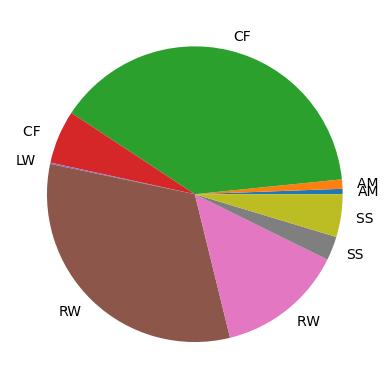

In [33]:
import matplotlib.pyplot as plt

# graafiku joonistamine

plt.pie(data_for_chart, labels=labels_for_chart)

NÄIDE 2. Millistel mänguminutitel on väravad löödud, läbi kõikide hooaegade kokku

In [34]:
pd.set_option('display.max_rows', 100)

# Et graafikul sorteerida minutid kasvavas järjekorras, tuleb need teisendada numbriteks (hetkel tekst)
# Selleks tuleb üleminutite read parandada

# Uurima millised väärtused tuleks parandada
minutes = df['Minute'] # tehakse ühe veeruga dataframe
minutes = minutes.drop_duplicates() # eemaldatakse duplikaadid
minutes.sort_values() # näitab tulemust

30       10
13       11
95      110
133      12
109      13
428      14
83       15
122      16
207      17
38       18
33       19
134      20
62       21
131      22
75       23
199      24
87       25
71       26
219      27
14       28
18       29
130       3
67       30
69       31
119      32
159      33
1        34
76       35
10       36
116      37
73       38
20       39
49        4
70       40
35       41
7        42
22       43
40       44
17       45
371    45+1
200    45+2
642    45+4
152      46
402      47
268      48
54       49
29        5
3        50
2        51
172      52
175      53
101      54
78       55
106      56
23       57
37       58
9        59
291       6
246      60
51       61
357      62
86       63
90       64
65       65
32       66
114      67
81       68
195      69
102       7
42       70
209      71
27       72
157      73
126      74
5        75
64       76
169      77
55       78
28       79
48        8
12       80
36       81
4        82
6   

In [35]:
# Parandamine
df['Minute'][df['Minute']=='90+4'] = '94'
df['Minute'][df['Minute']=='90+3'] = '93'
df['Minute'][df['Minute']=='90+2'] = '92'
df['Minute'][df['Minute']=='90+1'] = '91'
df['Minute'][df['Minute']=='45+4'] = '49'
df['Minute'][df['Minute']=='45+2'] = '47'
df['Minute'][df['Minute']=='45+1'] = '46'

# NB! See pole siiski 100% õige kuna I poolaja üleminutite väravad (45+1, 45+2 jne) muutuvad II poolaja avaminutite väravateks

In [36]:
df # kuvame parandatud dataframe

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho
5,05/06,LaLiga,21,1/29/06,A,FC Barcelona,RCD Mallorca,0:03,CF,75,0:02,Right-footed shot,Sylvinho
...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,21/22,Ligue 1,37,5/14/22,A,Paris Saint-Germain,Montpellier,0:04,CF,6,0:01,Left-footed shot,Kylian Mbappé
682,21/22,Ligue 1,37,5/14/22,A,Paris Saint-Germain,Montpellier,0:04,CF,20,0:02,Left-footed shot,Kylian Mbappé
683,21/22,Trophée des Champions,Final,7/31/22,H,Paris Saint-Germain,FC Nantes,4:00,CF,22,1:00,Right-footed shot,NaN
684,21/22,Ligue 1,1,08/06-22,A,Paris Saint-Germain,Clermont Foot,0:05,CF,80,0:04,Left-footed shot,Neymar


In [37]:
df["Minute"] = df["Minute"].astype(int) # teisendab minutid teksti tüübist täisarvudeks
df.dtypes # kuvab veergude tüübid, minutid on nüüd täisarvud

Season              object
Competition         object
Matchday            object
Date                object
Venue               object
Club                object
Opponent            object
Result              object
Playing_Position    object
Minute               int64
At_score            object
Type                object
Goal_assist         object
dtype: object

In [38]:
# Teeme uue liigendabeli nimega pv3: ridadel on minutid millal väravad löödi, veerud agregeerime kokku (columns = .. ei kasuta)

pv3 = pd.pivot_table(df, values = 'Type', aggfunc = 'count', index = 'Minute')

# kuvame saadud tabeli
pv3

,Type
Minute,
3,4
4,4
5,7
6,2
7,3
8,5
9,4
10,3
11,8


Text(0, 0.5, 'Väravate arv')

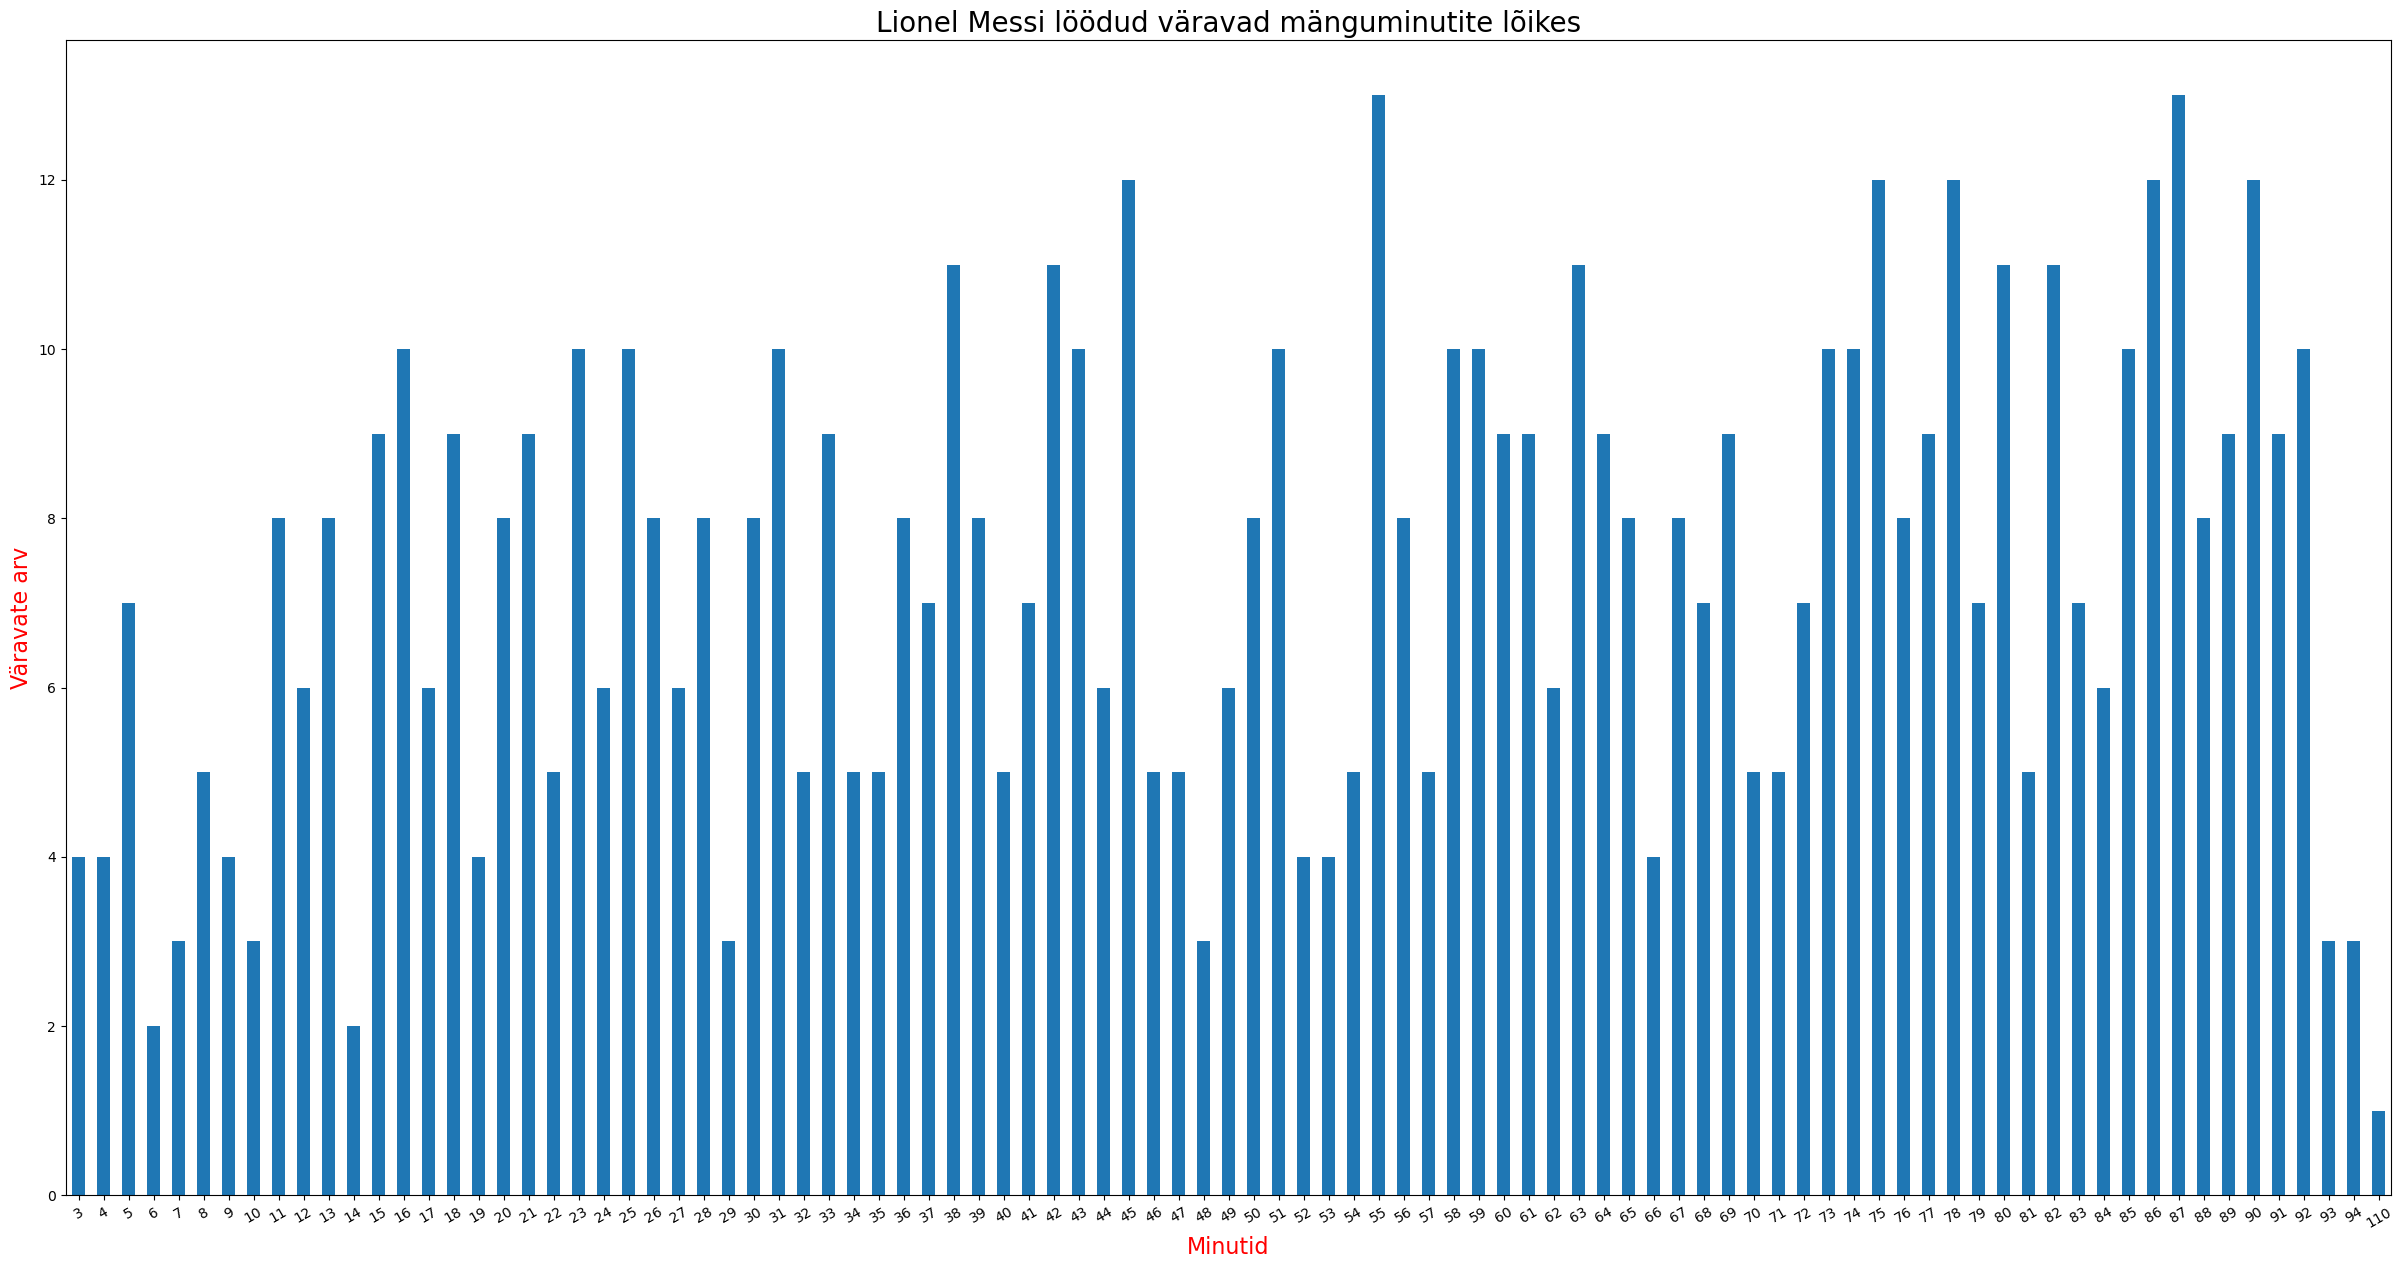

In [39]:
import matplotlib.pyplot as plt

# Graafiku joonistamine loodud tabeli "pv3" andmete põhjal

my_chart = pv3.plot(kind = 'bar', figsize = (30,15)) # stacked = True: pealelöökide tüübid kuvatakse üksteise peal, mitte kõrval

plt.title('Lionel Messi löödud väravad mänguminutite lõikes', fontsize = 20)
plt.xticks(rotation=30, ha='center', fontsize = 10)
plt.legend().set_visible(False) # legendi ei kuvata
plt.xlabel("Minutid", fontsize = 16, color = 'red') # lisab x-teljele pealkirja
plt.ylabel("Väravate arv", fontsize = 16, color = 'red') # lisab y-teljele pealkirja